# Figure 2.1: Discrete Probability Distribution Plot 


In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import seaborn as sns

try:
    from probml_utils import savefig, latexify
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    from probml_utils import savefig, latexify

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 88 kB 3.8 MB/s 
     |████████████████████████████████| 272 kB 18.4 MB/s 
     |████████████████████████████████| 132 kB 47.6 MB/s 
     |████████████████████████████████| 85 kB 4.2 MB/s 
     |████████████████████████████████| 121 kB 46.8 MB/s 
     |████████████████████████████████| 1.6 MB 40.9 MB/s 
     |████████████████████████████████| 83 kB 1.4 MB/s 
     |████████████████████████████████| 1.1 MB 51.9 MB/s 


In [2]:
latexify(width_scale_factor=2)

/usr/local/lib/python3.8/dist-packages/probml_utils/plotting.py:25: UserWarning: LATEXIFY environment variable not set, not latexifying
  warnings.warn("LATEXIFY environment variable not set, not latexifying")


[1 2 3 4 5]


/usr/local/lib/python3.8/dist-packages/probml_utils/plotting.py:84: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


[1. 0. 0. 0. 0.]
[1 2 3 4 5]


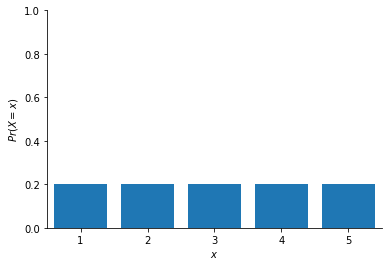

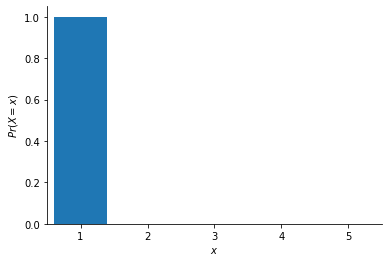

In [3]:
# Bar graphs showing a uniform discrete distribution and another with full mass on one value.
def make_graph(probs, N, save_name, fig=None, ax=None):
    x = jnp.arange(1, N + 1)
    print(x)
    if fig is None:
        fig, ax = plt.subplots()
    ax.bar(x, probs, align="center")
    ax.set_xlim([min(x) - 0.5, max(x) + 0.5])
    ax.set_xticks(x)
    ax.set_yticks(jnp.linspace(0, 1, N + 1))
    ax.set_xlabel("$x$")
    ax.set_ylabel("$Pr(X=x)$")
    sns.despine()
    if len(save_name) > 0:
        savefig(save_name)
    return fig, ax


# N = 4
N = 5

uniform_probs = jnp.repeat(1.0 / N, N)
_, _ = make_graph(
    uniform_probs, N, "uniform_histogram"
)  # Do not add .pdf or .png as it is automatically added by savefig method

# delta_probs = jnp.array([1, 0, 0, 0])
delta_probs = jnp.zeros(N)
delta_probs = delta_probs.at[0].set(1)
print(delta_probs)

_, _ = make_graph(delta_probs, N, "delta_histogram");

## Demo

You can see different examples of discrete distributions by changing the seed in the following demo.

In [4]:
from ipywidgets import interact


@interact(random_state=(1, 10), N=(2, 10))
def generate_random(random_state, N):
    key = jax.random.PRNGKey(random_state)
    probs = jax.random.uniform(key, shape=(N,))
    probs = probs / jnp.sum(probs)
    fig, ax = make_graph(probs, N, "")
    ax.set_yticks(jnp.linspace(0, 1, 11))

interactive(children=(IntSlider(value=5, description='random_state', max=10, min=1), IntSlider(value=6, descri…